<a href="https://colab.research.google.com/github/Ayeshanadaf796/google-playstore-apps-rating-prediction/blob/main/Google_Playstore_Apps_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1803,Harry Potter: Hogwarts Mystery,GAME,4.4,1107310,Varies with device,"10,000,000+",Free,0,Teen,Adventure,"August 1, 2018",1.8.2,4.4 and up
3015,"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91031,Varies with device,"5,000,000+",Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up
2390,Language Therapy: Aphasia,MEDICAL,NaN,10,28M,"1,000+",Paid,$74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
7561,"Length Converter: convert mm,cm,m, feet,yard,mile",TOOLS,4.7,76,2.2M,"50,000+",Free,0,Everyone,Tools,"April 5, 2018",1.4,4.0.3 and up
2898,Open Camera,PHOTOGRAPHY,4.3,116880,2.0M,"10,000,000+",Free,0,Everyone,Photography,"April 23, 2018",1.43.3,4.0.3 and up
9930,EU-Schwerbehinderung,NEWS_AND_MAGAZINES,NaN,3,32M,100+,Free,0,Everyone 10+,News & Magazines,"July 16, 2018",2.0.3.53,6.0 and up
7276,CF Themis,HEALTH_AND_FITNESS,NaN,0,8.5M,100+,Free,0,Everyone,Health & Fitness,"July 12, 2018",3.1.2,4.1 and up
5288,AK-47 Assult Rifle: Gun Shooting Simulator Game,GAME,NaN,1,5.8M,500+,Free,0,Everyone,Action,"May 17, 2018",2.0,4.0.3 and up
776,TOEFL Prep & Practice from Magoosh,EDUCATION,4.5,756,12M,"100,000+",Free,0,Everyone,Education,"June 18, 2018",3.2.0,4.1 and up
7354,Legit Check App by Ch Daniel,LIFESTYLE,4.9,66,8.1M,"1,000+",Free,0,Everyone,Lifestyle,"July 18, 2018",1.0,4.1 and up


In [5]:
data.shape

(10841, 13)

**Data Understanding and Cleaning**

In [6]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [7]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [8]:
data['Rating'].isnull().sum()

np.int64(0)

In [9]:
data.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],inplace = True)

In [10]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [11]:
data.duplicated().sum()

np.int64(483)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
data['Reviews'] = data['Reviews'].astype(int)

In [16]:
data['Installs'] = data['Installs'].astype(str) \
                   .str.replace(',','',regex = False)\
                   .str.replace('+','',regex = False) \
                   .astype(int)

In [17]:
data['Price'] = data['Price'].str.replace('$','').astype(float)

In [18]:
def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'k' in size:
    return float(size.replace('k',''))/1000
  else:
    return np.nan

In [19]:
data['Size'] = data['Size'].apply(convert_size)

In [20]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [22]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1525
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [23]:
data['Size'].fillna(data['Size'].mean(),inplace=True)

In [24]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [25]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,21.306613,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.000000,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [26]:
data.shape

(10346, 13)

**Exploratory Data Analysis**

Distribution of App Ratings

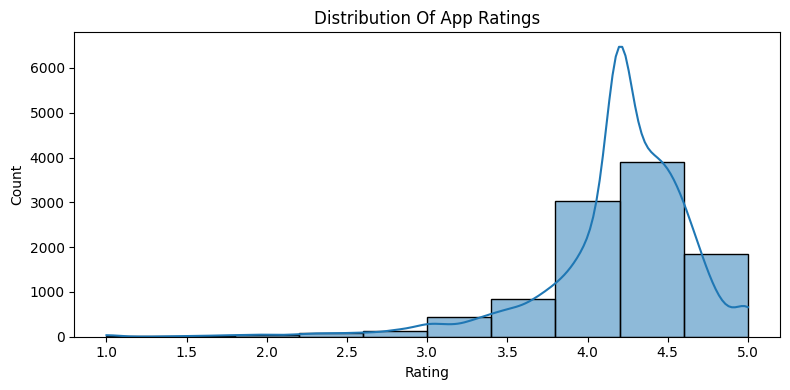

In [27]:
plt.figure(figsize=[8,4])
sns.histplot(data['Rating'],bins = 10, kde = True)
plt.title('Distribution Of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Top 10 Categories by Number of Apps

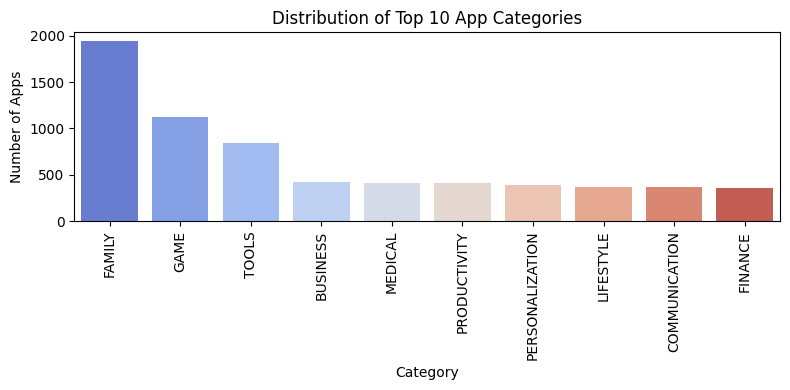

In [28]:
plt.figure(figsize=[8,4])
top_categories = data['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index,y = top_categories.values,palette= 'coolwarm')
plt.title('Distribution of Top 10 App Categories')
plt.xlabel('Category')
plt.xticks(rotation = 90,ha='center')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()

Free v/s Paid Apps

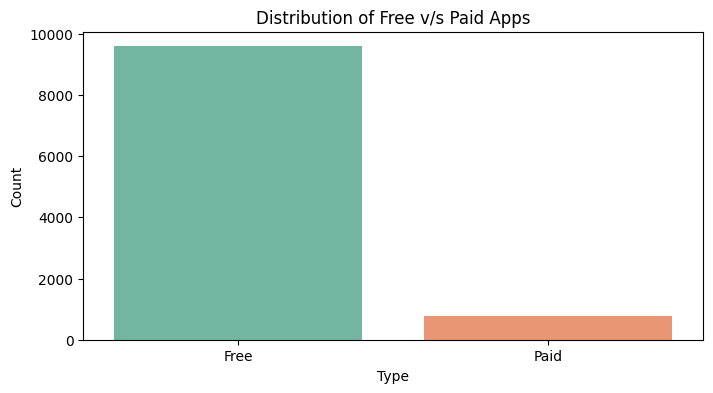

In [29]:
plt.figure(figsize=[8,4])
sns.countplot(x='Type',data=data,palette='Set2')
plt.title('Distribution of Free v/s Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Correlation between Reviews and Rating

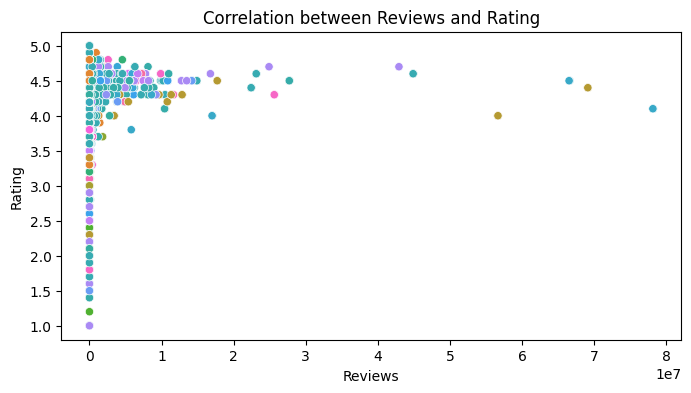

In [30]:
plt.figure(figsize=[8,4])
sns.scatterplot(data=data, x="Reviews", y="Rating", hue="Category", legend=False)
plt.title('Correlation between Reviews and Rating')
plt.show()

Price Distribution

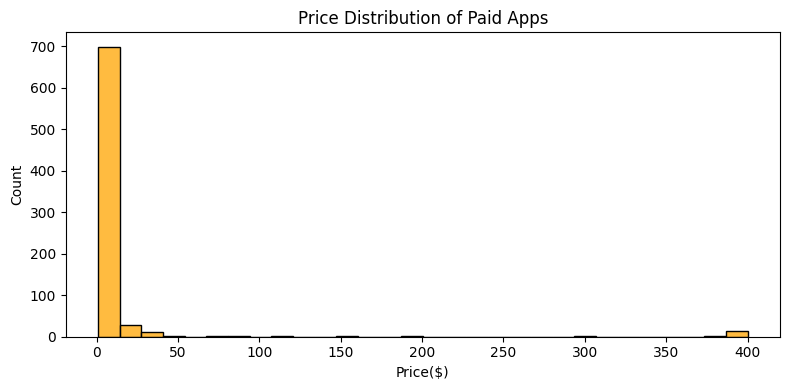

In [31]:
paid_apps = data[data['Type']== 'Paid']
plt.figure(figsize=[8,4])
sns.histplot(paid_apps['Price'],bins = 30,color='orange')
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Relationship Between Price and Rating

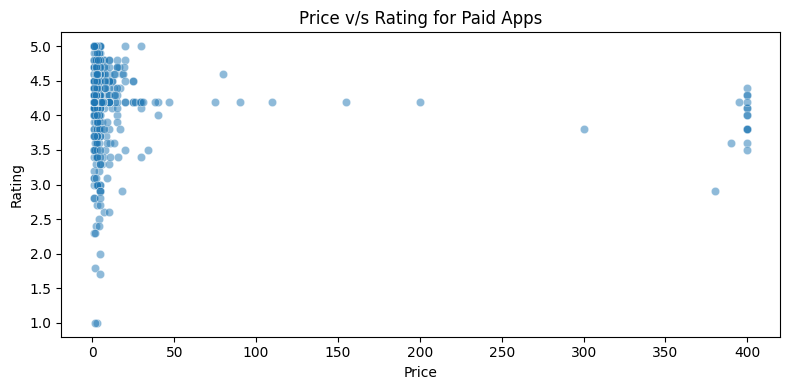

In [32]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='Price',y='Rating',data=paid_apps,alpha=0.5)
plt.title('Price v/s Rating for Paid Apps')
plt.tight_layout()
plt.show()

Content Rating Analysis

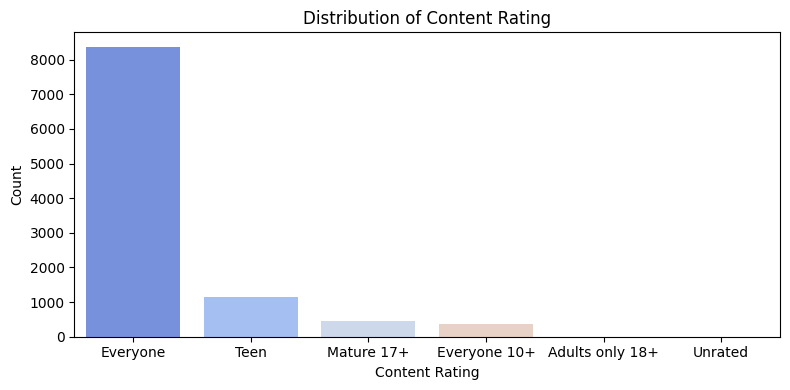

In [33]:
content_rating = data['Content Rating'].value_counts()
plt.figure(figsize=[8,4])
sns.barplot(x=content_rating.index,y=content_rating.values,palette='coolwarm')
plt.title('Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Content Rating v/s Rating

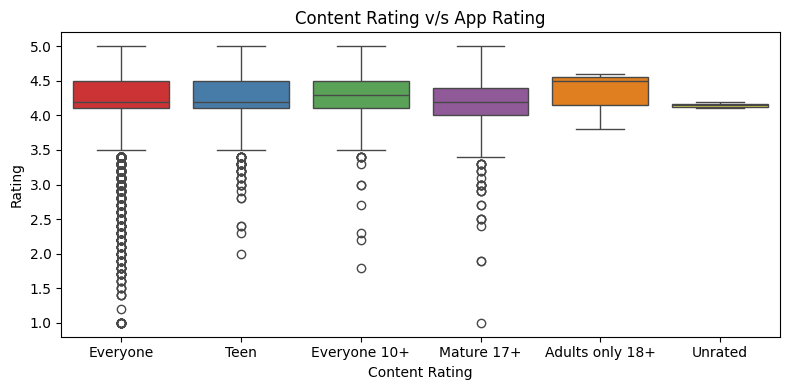

In [34]:
plt.figure(figsize=[8,4])
sns.boxplot(x ='Content Rating',y = 'Rating',data = data, palette='Set1')
plt.title('Content Rating v/s App Rating')
plt.tight_layout()
plt.show()

Genre and Installs Analysis

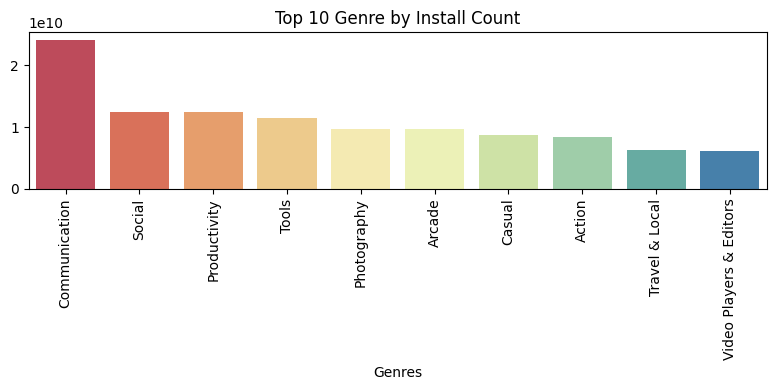

In [35]:
top_genres_installs=data.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=[8,4])
sns.barplot(x=top_genres_installs.index,y=top_genres_installs.values,palette='Spectral')
plt.title('Top 10 Genre by Install Count')
plt.xticks(rotation=90,ha='center')
plt.tight_layout()
plt.show()


Predicting App Rating (Machine Learning)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Encoding categorical columns
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Content Rating'] = label_encoder.fit_transform(data['Content Rating'])
data['Genres'] = label_encoder.fit_transform(data['Genres'])

# Features and Target
x = data[['Category','Type','Reviews','Size','Genres','Installs','Price','Content Rating']]
y = data['Rating']

# Handle missing values in target
y.fillna(y.median(), inplace=True)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Showing actual vs predicted rating
results = pd.DataFrame({'Actual Rating': y_test.values, 'Predicted Rating': y_pred})
print(results.head(10))

Mean Squared Error: 0.20780109774162503
R2 Score: 0.12341624707612064
   Actual Rating  Predicted Rating
0       4.600000          4.485000
1       4.800000          4.120000
2       4.193338          4.209472
3       4.500000          4.183000
4       4.300000          3.953000
5       3.700000          3.800000
6       4.400000          4.255000
7       4.200000          3.954000
8       4.400000          3.964933
9       4.600000          4.532000


In [37]:
results = pd.DataFrame({'App': data.loc[y_test.index, 'App'],
                        'Actual Rating': y_test.values,
                        'Predicted Rating': y_pred}).reset_index(drop=True)

results['Actual Rating'] = results['Actual Rating'].round(2)
results['Predicted Rating'] = results['Predicted Rating'].round(2)
results.head(10)


,App,Actual Rating,Predicted Rating
0,The Bump Pregnancy Tracker,4.60,4.49
1,FiSwitch,4.80,4.12
2,Pistachio Launcher for Android P 9.0,4.19,4.21
3,"Fox News – Breaking News, Live Video & News Al...",4.50,4.18
4,HomeAway Vacation Rentals,4.30,3.95
5,Showtime Anytime,3.70,3.80
6,Advanced Task Killer,4.40,4.26
7,CA DMV,4.20,3.95
8,Valentines love color by number-Pixel art colo...,4.40,3.96
9,Pinterest,4.60,4.53


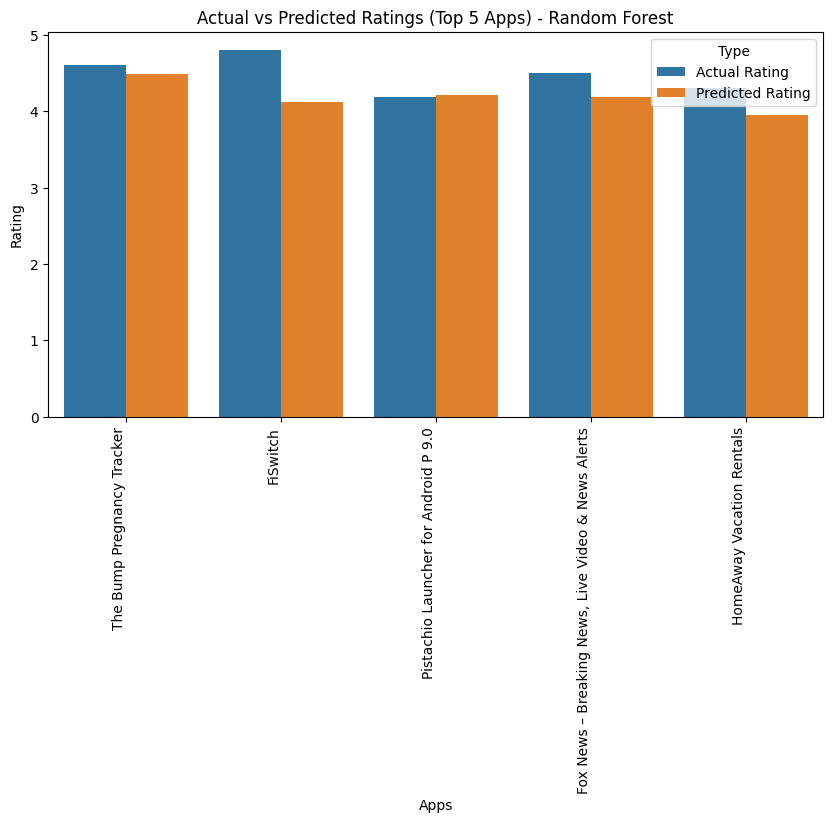

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting top 5 apps with actual names
top_5 = x_test.copy()
top_5['Actual Rating'] = y_test
top_5['Predicted Rating'] = y_pred
top_5 = top_5.head(5)

# Adding  app names
top_5['App'] = data.loc[top_5.index, 'App'].values

#plotting
plt.figure(figsize=(10,5))
sns.barplot(x='App', y='value', hue='variable',
            data=top_5[['App','Actual Rating','Predicted Rating']].melt(id_vars='App'))

plt.title('Actual vs Predicted Ratings (Top 5 Apps) - Random Forest')
plt.ylabel('Rating')
plt.xlabel('Apps')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Type')
plt.show()

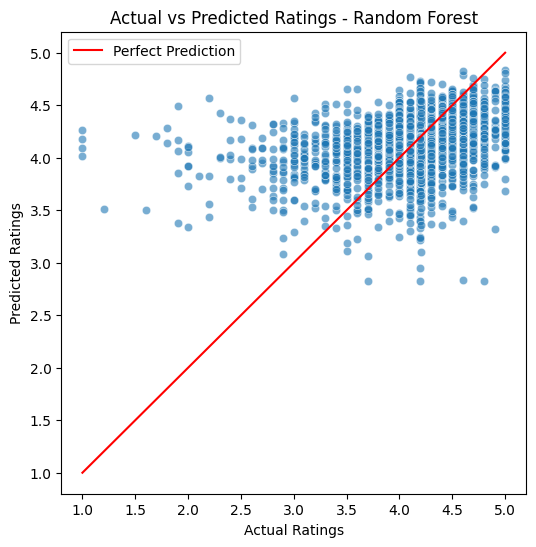

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Adding a perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="-", label="Perfect Prediction")

plt.title("Actual vs Predicted Ratings - Random Forest")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.legend()
plt.show()

**Conclusion:**


1.   The model achieved a Mean Squared Error (MSE) of ~0.20 and an R² score of ~0.12, indicating that while it captures some variance in the ratings, performance can be improved.
2.  Further improvements could involve feature engineering, better handling of categorical variables or larger datasets for training

